### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Segunda tarea programada 2022-I


Estudiantes: Juan Ignacio Navarro Navarro

## Pregunta 1. Graficación

---

Para las siguientes:

Función 1:

$f_{1}\left(x_{1},x_{2}\right)=\left(x_{1}-0.7\right)^{2}+\left(x_{2}-0.5\right)^{2}$


Función 2: 

$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$


Realice lo siguiente (5 puntos):

En Python, cree una función que le permita graficar las funciones anteriores. Utilizando la función en Python genere dos gráficos, uno para cada función $𝑓_{1}$ y  $𝑓_{2}$. 

C:\Users\juan navarro\AppData\Local\Temp\ipykernel_2056\3083580836.py:31: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



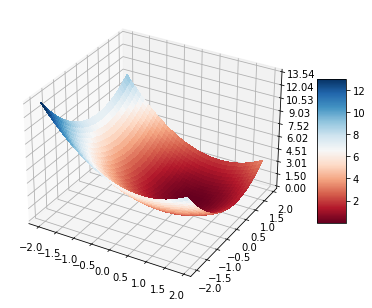

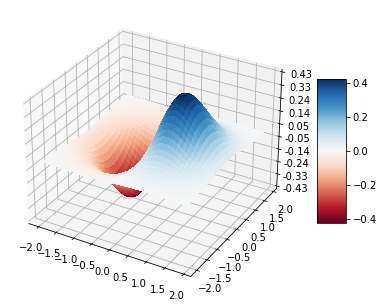

In [20]:

from numpy import exp,arange
from pylab import meshgrid,cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

#Se define la funcion que se va a graficar

def func_1(x1,x2):
    """
    Este método define el resultado de la función 1
    del enunciado dados dos valores x1 y x2
    """
    return (x1 - 0.7)**2 + (x2 - 0.5)**2


def func_2(x1, x2):
    """
    Este método define el resultado de la función 2
    del enunciado dados dos valores x1 y x2
    """
    return x1 * exp(-x1**2 - x2**2)

def grafica3D(X,Y,Z):
    """
    Esta fución realiza la gráfica una función con dos variables
    independientes X, Y y una dependiente Z
    """
    fig = plt.figure()
    ax = Axes3D(fig)

    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()


# Definición del rango de valores a graficar
x = arange(-2.0,2.0,0.1)
y = arange(-2.0,2.0,0.1)

#Se define la grilla de puntos para x y y
X,Y = meshgrid(x, y)

# Se evalua la primera funcion 1 segun los valores de X y Y
Z = func_1(X, Y)

# Se gafica la primera función 1
grafica3D(X,Y,Z)

# Se evalua la segunda funcion 2 con los valores de X y Y 
Z = func_2(X, Y)

# Se grafica la primera funcion 2
grafica3D(X, Y, Z)

## Pregunta 2. Optimización
---

**a) Vector gradiente  (5 puntos)**

Calcule el vector gradiente $\nabla f$ para la siguiente función multi-variable $f: \mathbb{R}^2\rightarrow\mathbb{R}$. Además, evalúelo en $\begin{bmatrix}1\\1\end{bmatrix}$ y $\begin{bmatrix}-1\\-1\end{bmatrix}$. 

--No se require programación en python--.

 - $f_3(x,y) = x^4+y^3+5x^2y^3$

### Respuesta

El gradiente de la función $f_3$ es:

$$\nabla _{f_3}(x, y) = (4x^3 + 10xy^3, 3y^2+ 15x^2y^2)$$

Al evaluar el vector en $\begin{bmatrix}1\\1\end{bmatrix}$ se obtiene:

$$\nabla _{f_3}(1, 1) = (4 + 10, 3 + 15)$$
$$\nabla _{f_3}(1, 1) = (14, 18)$$

Ahora al evaluarlo en $\begin{bmatrix}-1\\-1\end{bmatrix}$:

$$\nabla _{f_3}(-1, -1) = (-4 + 10, 3 + 15)$$
$$\nabla _{f_3}(-1, -1) = (6, 18)$$


**b) Descenso de gradiente (10 puntos)**

**Sea la función:** 

\begin{equation}
f_4\left(\overrightarrow{x}\right)=(x-0.7)^{2}+(y-0.5)^{2},
\end{equation}


**Implemente el algoritmo de descenso de gradiente para $f_4(x)$ en la función en Python denominada: (8 puntos)**

$$funcion\_gradient\_descent \left(learning\_rate, max\_iters, starting\_point, f\_function,f\_gradient, precision\right)$$

donde los parámetros corresponden a:

* learning_rate: tasa_aprendizaje o el $\alpha$
* max_iters: es el máximo número de iteraciones a ejecutar
* starting_point: es el vector con los dos valores iniciales [x,y]
* f_function: fución a optimizar
* f_gradient: gradiente de la función a optimizar.
* precision: es el valor mínimo para un cambio entre iteración. 

Despliegue y analice los resultados (2 puntos).

In [36]:
def func_4(x, y):
    """
    Codigo de la función 4 definida en el enunciado
    """
    return (x - 0.7)^2 + (y - 0.5)^2

def gfunc_4(x, y):
    """
    Gradiente de la función 4 definida en el enunciado
    """
    return 2*(x - 0.7), 2*(y - 0.5)

def function_gradient_descent(learning_rate, max_iters, starting_point, f_function, f_gradient, precision):
    """
    Esta función calcula el restultado del algoritmo de descenso de gradiente
    """
    current_value = starting_point
    grad_norm = 1
    iters = 0

    # iteracion hasta que la noram del gradiente sea menos a la precision indicada
    while grad_norm > precision and iters < max_iters:
        curr_x = current_value[0]
        curr_y = current_value[1]
        curr_grad = f_gradient(curr_x, curr_y)
        prev_value = current_value
        # calculo del nuevo valor: x = x - k * gradiente( f(x) )
        current_value = prev_value[0] - learning_rate * curr_grad[0] , prev_value[1] - learning_rate * curr_grad[1]
        # actualización de la norma del gradiente
        grad_norm = (curr_grad[0]**2 + curr_grad[1]**2)**0.5
        iters += 1

    return current_value

# definicion de las variables iniciales
learning_rate = 0.01
max_iters = 10000
starting_point = (3, 2)
f_function = func_4
f_gradient = gfunc_4
precision = 0.000001

# como resultado se imprime el valor del descenso de gradiente
print(function_gradient_descent(learning_rate, max_iters, starting_point, f_function, f_gradient, precision))



(0.7000004034652348, 0.5000002631295011)


## Pregunta 3. Análisis de regresión con aprendizaje profundo (con PyTorch)

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset (copia adjunta).   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscópio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

Dado el conjunto de datos de abulones se **desea crear un modelo de regresión utilizando un perceptrón multicapa para predecir la cantidad de anillos (columna Rings) de estos a partir del conjunto de características**.

Realice lo siguiente:

(requisito indispensable para tomar en cuenta el ejercicio, deben usar PyTorch).
- a) (1 punto) Describa el conjunto de datos, cada uno de sus campos y referencie la fuente. 
- b) Cargue el conjunto de datos.
- c) (3 puntos) Explore y limpie el conjunto de datos, visualice algunas estadísticas, presente una matriz de calor y verifique que no existan valores faltantes.
- d) (5 puntos) Defina el modelo utilizando un perceptrón multicapa implementado con PyTorch.
- e) (5 puntos) Realice el entrenamiento del modelo.
- f) (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
- g) (2 puntos) Prepare un ejemplo de uso del modelo seleccionado y explique el resultado.
- h) (5 puntos) Realice al menos tres conclusiones sobre el ejercicio.

#### a)

Descripción de los datos:

- Lenght: corresponde a la longitud más larga de la concha en milímetros.
- Diameter: al diametro en milimetros perpendicular a la longitud.
- Height: Es la altura en milimetros con carne en la concha.
- Whole: Es el peso total en gramos de todo el abalón.
- Viscera: Es el peso en gramos de la carne.
- Shellweight: Es el peso de la concha en gramos después de ser secada.
- Rings: es un entero que corresponde a la cantidad de anillos. Es 1.5 más en adición a la cantidad de años del abalón.



#### b)
- Carga de los datos


In [47]:
# Bibliotecas requeridas para el ejercicio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch as torch

import seaborn as sns

In [40]:
# Carga de los datos de los abalones

data = pd.read_csv('datos/Abalone.csv')

print(data)

     Length  Diameter  Height   Whole  Viscera  Shellweight  Rings
0     0.745     0.585   0.215  2.4990   0.4720       0.7000     17
1     0.740     0.600   0.195  1.9740   0.4085       0.7100     16
2     0.735     0.590   0.225  1.7560   0.3405       0.5800     21
3     0.730     0.595   0.230  2.8255   0.4190       0.8970     17
4     0.725     0.560   0.210  2.1410   0.3980       1.0050     18
..      ...       ...     ...     ...      ...          ...    ...
982   0.155     0.105   0.050  0.0175   0.0035       0.0050      4
983   0.150     0.100   0.025  0.0150   0.0040       0.0050      2
984   0.130     0.100   0.030  0.0130   0.0030       0.0040      3
985   0.110     0.090   0.030  0.0080   0.0020       0.0030      3
986   0.075     0.055   0.010  0.0020   0.0005       0.0015      1

[987 rows x 7 columns]


#### c)
- Exploración de los datos y mapa de calor

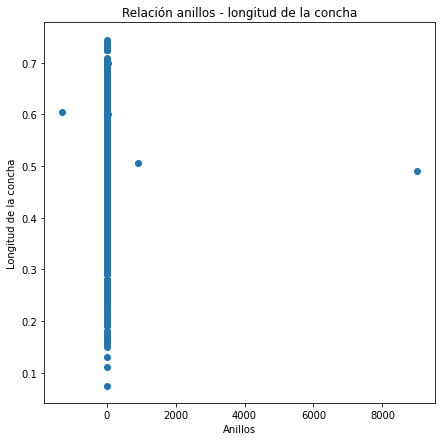

In [43]:
# distribución de los anillos con respecto a la longitud

def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    
plot_data(data,'Rings', 'Length', 'Anillos','Longitud de la concha',
          'Relación anillos - longitud de la concha')  

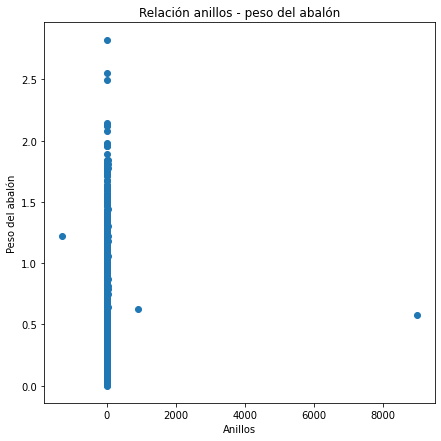

In [44]:
# En el caso de una comparación de los anillos con el peso de todo el abalon

plot_data(data,'Rings', 'Whole', 'Anillos','Peso del abalón',
          'Relación anillos - peso del abalón')  

In [45]:
# Estadíticas de los datos

pd.set_option('display.float_format', lambda x: '%.2f' % x)

data.describe()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,987.00,987.00,987.00,987.00,987.00,987.00,987.00
mean,0.49,0.38,0.13,0.71,0.16,0.22,19.57
std,0.12,0.10,0.04,0.45,0.10,0.14,290.58
min,0.07,0.06,0.01,0.00,0.00,0.00,-1300.00
25%,0.41,0.32,0.10,0.35,0.07,0.10,8.00
50%,0.51,0.40,0.14,0.66,0.15,0.20,10.00
75%,0.58,0.46,0.16,1.00,0.22,0.30,13.00
max,0.74,0.60,0.24,2.83,0.54,1.00,9000.00


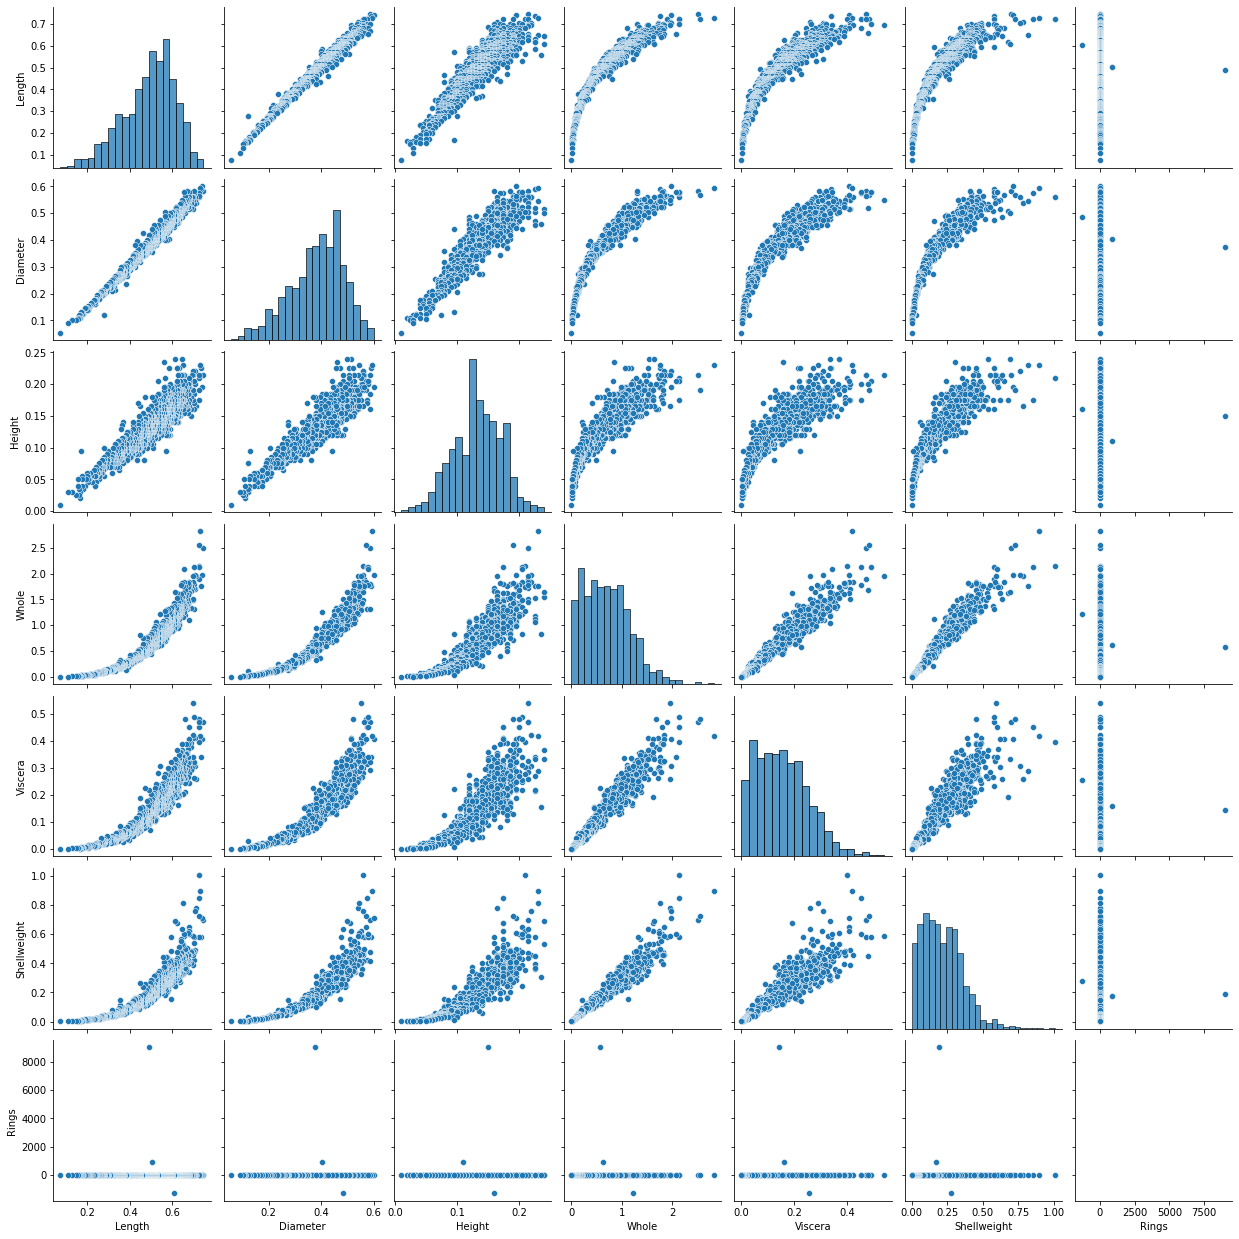

In [48]:
# La siguiente gráfica presenta relación entre pares de variables.

# En la diagonal se ven los histogramas de cada variables
# La segunda fila presenta la ultima fila presenta la relación de la variable Anillos
# con todas las demás

sns.pairplot(data)

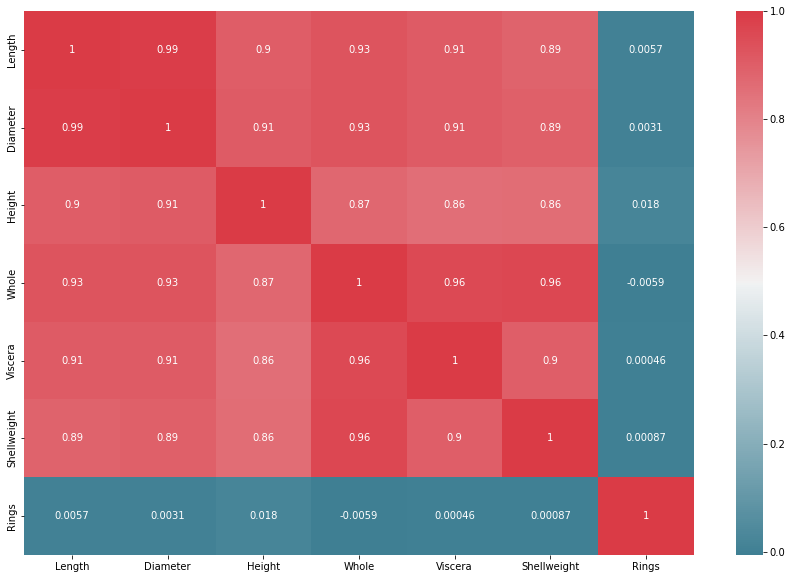

In [50]:
# Matriz de correlación de los datos

# A continuación se muestra la correlación de los datos por medio del mapa de calor

# Se puede observar que los datos están muy relacionados entre sí a excepción de 
# las relaciones con los anillos. 

def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data)